# Preprocessing of the human hematopoiesis dataset

Notebook for preprocessing human hematopoiesis dataset.

## Library imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplscience

import anndata as ad
import scanpy as sc
import scvelo as scv
from velovi import preprocess_data

from rgv_tools import DATA_DIR, FIG_DIR
from rgv_tools.preprocessing import set_prior_grn

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_t

## General settings

In [2]:
sc.settings.verbosity = 2
scv.settings.verbosity = 3

In [3]:
plt.rcParams["svg.fonttype"] = "none"

## Constants

In [4]:
DATASET = "hematopoiesis"

In [5]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "processed").mkdir(parents=True, exist_ok=True)

In [6]:
SAVE_FIGURES = False
if SAVE_FIGURES:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)

FIGURE_FORMAT = "svg"

## Data loading

In [7]:
adata = ad.io.read_h5ad(DATA_DIR / DATASET / "raw" / "hsc_dynamo_adata.h5ad")
adata

AnnData object with n_obs × n_vars = 1947 × 21701
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'frac', 'use_for_pca'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'draw_graph', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu', 'X_new', 'X_spliced', 'X_total', 'X_unspliced', 'new', 'spliced', 'total', 'unspliced', 'velocity', 'veloci

In [8]:
tfs = pd.read_csv(DATA_DIR / DATASET / "raw" / "allTFs_hg38.csv", header=None)
gt_net = pd.read_csv(DATA_DIR / DATASET / "raw" / "skeleton.csv", index_col=0)

## Visualization

## Preprocessing

In [9]:
scv.pp.filter_and_normalize(adata, min_shared_counts=10, log=False, n_top_genes=2000)

Filtered out 17891 genes that are detected 10 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.


In [10]:
sc.pp.neighbors(adata, n_neighbors=50)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:06)


In [11]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
adata

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1947 × 2000
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'frac', 'use_for_pca', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'PCs', 'cell_type_colors', 'draw_graph', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u',

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


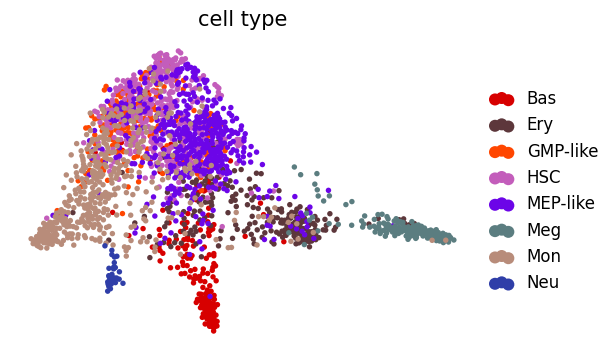

In [12]:
with mplscience.style_context():
    fig, ax = plt.subplots(figsize=(6, 4))
    sc.pl.scatter(adata, basis="draw_graph_fa", color="cell_type", frameon=False, ax=ax)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / f"intro_figure.{FIGURE_FORMAT}",
            format=FIGURE_FORMAT,
            transparent=True,
            bbox_inches="tight",
        )

In [13]:
if SAVE_DATA:
    adata.write_h5ad(DATA_DIR / DATASET / "processed" / "adata_preprocessed_full.h5ad")

## RegVelo preprocessing

In [14]:
adata = set_prior_grn(adata, gt_net)

In [15]:
velocity_genes = preprocess_data(adata.copy()).var_names.tolist()

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [16]:
tf_grn = adata.var_names[adata.uns["skeleton"].T.sum(0) != 0].tolist()
tf = list(set(tfs.iloc[:, 0].tolist()).intersection(tf_grn))
adata.var["tf"] = adata.var_names.isin(tf)

Select genes that are either part of the transcription factor (TF) list or `velocity_genes`

In [17]:
var_mask = np.union1d(adata.var_names[adata.var["tf"]], velocity_genes)
adata = adata[:, var_mask].copy()

In [18]:
adata = preprocess_data(adata, filter_on_r2=False)

In [19]:
# Filter the skeleton matrix `W` based on the selected indices
skeleton = adata.uns["skeleton"].loc[adata.var_names.tolist(), adata.var_names.tolist()]

# Update the filtered values in `uns`
adata.uns.update({"skeleton": skeleton, "regulators": adata.var_names.tolist(), "targets": adata.var_names.tolist()})

In [20]:
## focus on velocity genes to ensure calculation stability of scvelo and veloVI
adata.var["velocity_genes"] = adata.var_names.isin(velocity_genes)

## Save dataset

In [21]:
if SAVE_DATA:
    adata.write_h5ad(DATA_DIR / DATASET / "processed" / "adata_preprocessed.h5ad")